In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/raw/train_test.csv')

#removing stores which are closed
closed_stores = [8332, 1296, 3094, 2969, 6554, 1436, 4637, 4381, 1821, 1568, 1067, 7980, 3887, 7223, 8125, 7870, 6211, 3269, 2119, 73, 9674, 2123, 9548, 7883, 2257, 5597, 9438, 6376, 2153, 4077, 111, 1010, 116, 1012, 8950, 247, 1407]

data_only_open = data[~(data['store_id'].isin(closed_stores))]

data_only_open = data_only_open.drop(columns=['carpark'])
data_for_kmeans = data_only_open.groupby(['store_id']).mean()

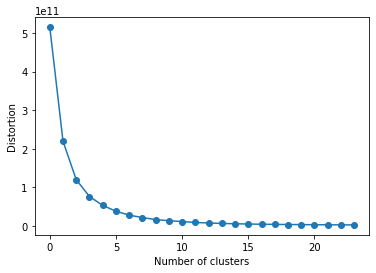

In [3]:
n_clusters = 25
distortions = []
for i in range(1, n_clusters):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=42
    )
    km.fit(data_for_kmeans)
    distortions.append(km.inertia_)

d =pd.DataFrame(distortions)
d = d.reset_index()
d.columns = ['clusters','distortions']

# plot
plt.plot(d['clusters'],d['distortions'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [4]:
km = KMeans(
        n_clusters=5, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=42
    )
data_for_kmeans['cluster'] = km.fit_predict(data_for_kmeans)

In [5]:
lookup = data_for_kmeans['cluster']

In [6]:
data_with_clusters = (data.set_index('store_id')).join(lookup)

In [7]:
data_with_clusters.to_csv('../data/processed/data_with_clusters.csv')

In [8]:
cl0 = (data_with_clusters[data_with_clusters['cluster']==0]).reset_index()
cl1 = (data_with_clusters[data_with_clusters['cluster']==1]).reset_index()
cl2 = (data_with_clusters[data_with_clusters['cluster']==2]).reset_index()
cl3 = (data_with_clusters[data_with_clusters['cluster']==3]).reset_index()
cl4 = (data_with_clusters[data_with_clusters['cluster']==4]).reset_index()

stores_in_cl0 = set(cl0['store_id'])
stores_in_cl1 = set(cl1['store_id'])
stores_in_cl2 = set(cl2['store_id'])
stores_in_cl3 = set(cl3['store_id'])
stores_in_cl4 = set(cl4['store_id'])

print(f'number of stores in cluster 0: {len(stores_in_cl0)}')
print(f'number of stores in cluster 1: {len(stores_in_cl1)}')
print(f'number of stores in cluster 2: {len(stores_in_cl2)}')
print(f'number of stores in cluster 3: {len(stores_in_cl3)}')
print(f'number of stores in cluster 4: {len(stores_in_cl4)}')

number of stores in cluster 0: 196
number of stores in cluster 1: 67
number of stores in cluster 2: 29
number of stores in cluster 3: 182
number of stores in cluster 4: 89
